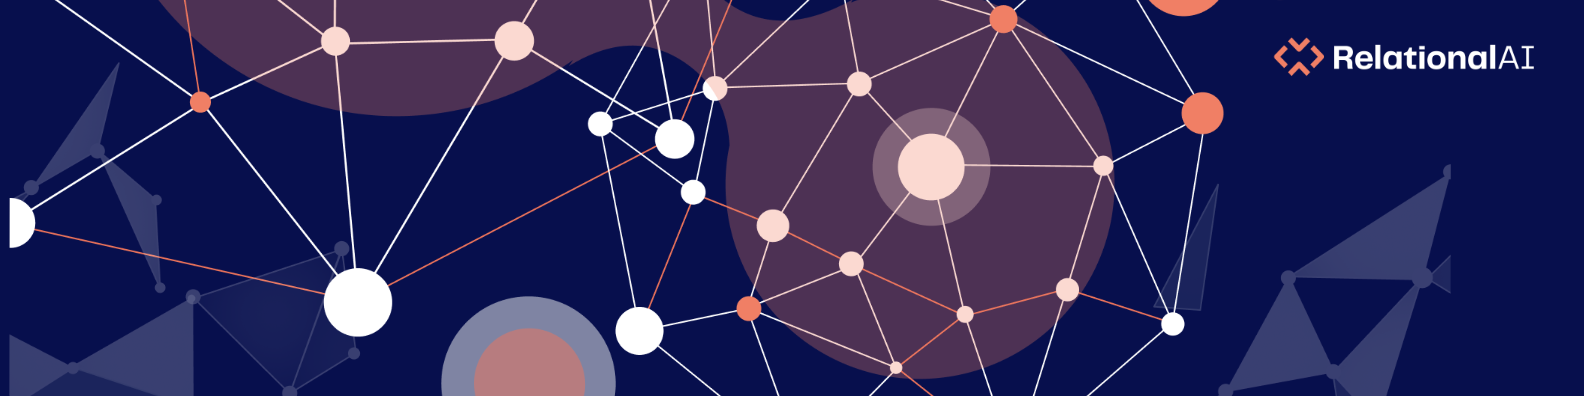

# Degree analysis 

Degree analysis is widely used in network analysis to identify the most important nodes in a graph. It can be used to enrich the graph with additional information about the nodes. That can be used later on for further analysis with other algorithms.

The degree of a node in an undirected graph is the number of edges connected to it. And for directed graphs, in-degree is the number of edges coming into the node, and out-degree is the number of edges going out of the node.

Let us look at a very small example social graph and see how we can compute the degrees of its nodes.

First, we need to import the `relationalai` library and define our model, which we call `DegreeAnalysis`. We also create a type called `Person`.

In [1]:
def install_packages():
    import os
    os.system('pip install relationalai')

install_packages()

In [2]:
import relationalai as rai
from relationalai.std.graphs import Graph

model = rai.Model("DegreeAnalysis")
Person = model.Type("Person")

## Let's add some data to our model

We're going to use use a `friendship` list we define as a data source to iterate over it and populate our model with objects. We create `Person` objects with a `name` property and also add a link from one person to the other as a `friends` property.


In [3]:
friendships = [
  ("Alice", "Bob"),  ("Alice", "David"),
  ("Bob", "David"), ("Charlie", "David"),
  ("David", "Emily"), ("Emily", "Frank"), 
  ("Emily", "Henry"), ("Frank", "Grace"),
  ("Frank", "Henry"), ("Grace", "Henry"),
  ("Kevin", "Mark"), ("Lily", "Mark"), 
  ("Mark", "Nancy"), ("Nancy", "Lily"),
  ("Mark", "Oscar"), ("Oscar", "Nancy")
]

with model.rule(dynamic = True):
    for (person_name, friend_name) in friendships:
        person = Person.add(name = person_name)
        person.friends.add(Person.add(name = friend_name))

## Creating the Graph
Let's start by creating a `graph` with nodes and edges. We add all `Person` instances to `Node` type, and assign the `label` property so that we can visualize it later in the graph. We then add the `friends` property to `Edge` type. 

In [4]:
# Create a directed graph
graph = Graph(model, undirected = False)
Node, Edge = graph.Node, graph.Edge

# add all Person instances as Nodes, assign `label` property (for displaying)
Node.extend(Person, label = Person.name)

# add all `friends` properties as Edges
Edge.extend(Person.friends)

## Running the algorithm

To calculate the degree of each node, we use the `degree` function from RelationalAI's `compute` object of a graph. We set the result as a property of a `Node` representing a person.

In [5]:
with model.rule():
    person = Person()
    person_node = Node(person)
    degree = graph.compute.degree(person_node)
    person_node.set(degree = degree)

## Visualizing the results

To better understand the results, we can visualize the graph using the `visualize` function on the graph object. We set the node size to be proportional to the `degree` score from the previous step. We also set the color for the nodes and edges.

In [6]:
graph.visualize(three = False, style = {
    "node": {
        "color": "blue",
        "size": lambda n: n['degree'] * 10,
    },
    "edge": {
        "color": "green",
    }
}).display(inline = True)

> **Tip**. As we can see nodes with higher degree are shown in a larger size. 

## Querying the graph
We can also query the graph to get all the nodes and their degree, using `model.query()` context and `graph.Node()` or `graph.Edge()` types. This is useful when we want to use the degree information in further analysis.

In [7]:
with model.query() as select:
    person = Person()
    node = Node(person)
    response = select(person.name, node.degree)

response.results.sort_values(by = 'degree', ascending = False)

name  degree
3     David       4
10     Mark       4
4     Emily       3
5     Frank       3
7     Henry       3
11    Nancy       3
0     Alice       2
1       Bob       2
6     Grace       2
9      Lily       2
12    Oscar       2
2   Charlie       1
8     Kevin       1

We can also filter the nodes based on the degree value. For example, we can get all the nodes with degree greater or equal to 4.


In [8]:
with model.query() as select:
    person = Person()
    node = Node(person)
    node.degree >= 4
    response = select(person.name, node.degree)

response

## In-degree and Out-degree

We can also calculate the in-degree and out-degree of each node in a directed graph. We can use the `in_degree` and `out_degree` functions. We're going to use the same graph as before, and enrich each node with the in-degree and out-degree information.


In [9]:
with model.rule():
    person = Person()
    person_node = Node(person)
    in_degree = graph.compute.indegree(person_node)
    out_degree = graph.compute.outdegree(person_node)
    person_node.set(in_degree = in_degree, out_degree = out_degree)

As a final step, we can query the graph to get the degree, in-degree, and out-degree of each node.

In [10]:
with model.query() as select:
    person = Person()
    node = Node(person)
    response = select(person.name, node.degree, node.in_degree, node.out_degree)

response